In [5]:
import os, json, joblib, numpy as np, pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
class paths:
    OUTPUT_DIR = "C:\\Users\\konno\\SynologyDrive\\datasciense\\projects_foler\\1_kaggle\\CMI\\cmi-detect-behavior-with-sensor-data\\output"
    TRAIN_CSV = "C:\\Users\\konno\\SynologyDrive\\datasciense\\projects_foler\\1_kaggle\\CMI\\cmi-detect-behavior-with-sensor-data\\train.csv"
    TRAIN_DEMOGRAPHICS = "C:\\Users\\konno\\SynologyDrive\\datasciense\\projects_foler\\1_kaggle\\CMI\\cmi-detect-behavior-with-sensor-data\\train_demographics.csv"
    SAMPLE_TRAIN = 'C:\\Users\\konno\\SynologyDrive\\datasciense\\projects_foler\\1_kaggle\\CMI\\cmi-detect-behavior-with-sensor-data\\sample_train.csv'

In [7]:
df = pd.read_csv(paths.TRAIN_CSV)
df_dem = pd.read_csv(paths.TRAIN_DEMOGRAPHICS)

In [8]:
df['gesture'].unique()

array(['Cheek - pinch skin', 'Forehead - pull hairline',
       'Write name on leg', 'Feel around in tray and pull out an object',
       'Neck - scratch', 'Neck - pinch skin', 'Eyelash - pull hair',
       'Eyebrow - pull hair', 'Forehead - scratch',
       'Above ear - pull hair', 'Wave hello', 'Write name in air',
       'Text on phone', 'Pull air toward your face',
       'Pinch knee/leg skin', 'Scratch knee/leg skin',
       'Drink from bottle/cup', 'Glasses on/off'], dtype=object)

In [9]:
print(df.columns[8:30])
print(df.columns[:8])

Index(['gesture', 'acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y',
       'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5', 'tof_1_v0',
       'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6',
       'tof_1_v7', 'tof_1_v8'],
      dtype='object')
Index(['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject',
       'orientation', 'behavior', 'phase'],
      dtype='object')


In [49]:
df_acc = df[['row_id', 'sequence_type', 'sequence_id','sequence_counter','acc_x', 'acc_y', 'acc_z']]
print(df_acc.head)
print(df_acc.shape)



<bound method NDFrame.head of                    row_id sequence_type sequence_id  sequence_counter  \
0       SEQ_000007_000000        Target  SEQ_000007                 0   
1       SEQ_000007_000001        Target  SEQ_000007                 1   
2       SEQ_000007_000002        Target  SEQ_000007                 2   
3       SEQ_000007_000003        Target  SEQ_000007                 3   
4       SEQ_000007_000004        Target  SEQ_000007                 4   
...                   ...           ...         ...               ...   
574940  SEQ_065531_000048    Non-Target  SEQ_065531                48   
574941  SEQ_065531_000049    Non-Target  SEQ_065531                49   
574942  SEQ_065531_000050    Non-Target  SEQ_065531                50   
574943  SEQ_065531_000051    Non-Target  SEQ_065531                51   
574944  SEQ_065531_000052    Non-Target  SEQ_065531                52   

           acc_x     acc_y     acc_z  
0       6.683594  6.214844  3.355469  
1       6.94921

(57, 7)


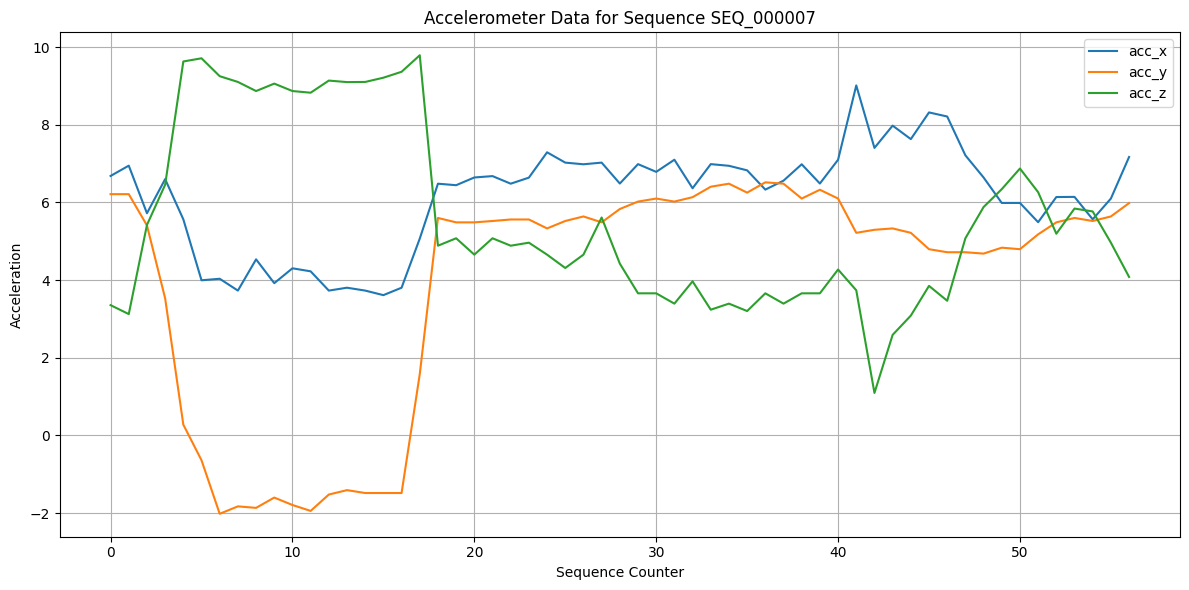

In [11]:
first_sequence_id = df_acc['sequence_id'].iloc[0]
sequence = df_acc[df_acc['sequence_id'] == first_sequence_id]

print(sequence.shape)
# Plot acc_x, acc_y, acc_z over time (sequence_counter)
plt.figure(figsize=(12, 6))
plt.plot(sequence['sequence_counter'], sequence['acc_x'], label='acc_x')
plt.plot(sequence['sequence_counter'], sequence['acc_y'], label='acc_y')
plt.plot(sequence['sequence_counter'], sequence['acc_z'], label='acc_z')

plt.title(f'Accelerometer Data for Sequence {first_sequence_id}')
plt.xlabel('Sequence Counter')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# sequence

In [29]:
df_acc['sequence_id'].unique()[2]

'SEQ_000013'

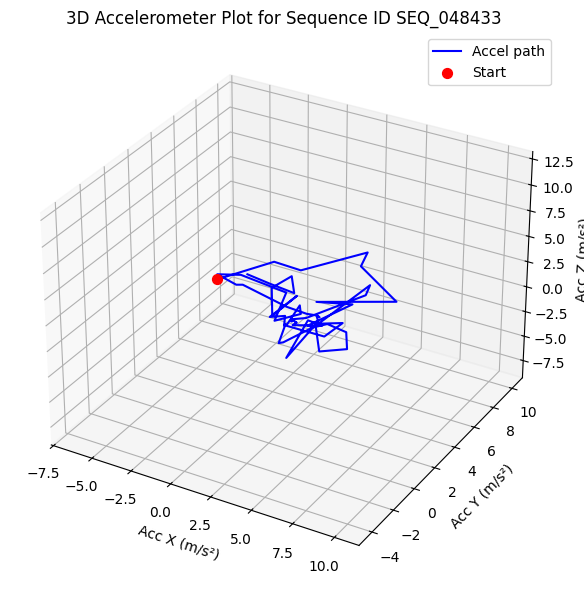

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

number = 6000  # index of the sequence you want to plot

# Get the sequence_id from df_acc (which stores one row per sequence)
sequence_id = df_acc['sequence_id'].unique()[number]

# Now get the full sequence from df
sequence = df[df['sequence_id'] == sequence_id]

# Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 3D line plot of acceleration
ax.plot(sequence['acc_x'], sequence['acc_y'], sequence['acc_z'], color='blue', label='Accel path')

# Starting point marker
ax.scatter(
    sequence['acc_x'].iloc[0],
    sequence['acc_y'].iloc[0],
    sequence['acc_z'].iloc[0],
    color='red', s=50, label='Start'
)

ax.set_xlabel('Acc X (m/s²)')
ax.set_ylabel('Acc Y (m/s²)')
ax.set_zlabel('Acc Z (m/s²)')
ax.set_title(f'3D Accelerometer Plot for Sequence ID {sequence_id}')
ax.legend()
plt.tight_layout()
plt.show()

In [55]:
####
number = 6000  # index of the sequence you want to plot

# Get the sequence_id from df_acc (which stores one row per sequence)
sequence_id = df['sequence_id'].unique()[number]

# Now get the full sequence from df
sequence_rot = df[df['sequence_id'] == sequence_id]

df_quat = sequence_rot[['rot_w', 'rot_x', 'rot_y','rot_z']]

quaternions_rot = df_quat.to_numpy()
quaternions_rot
###

array([[ 0.45422363,  0.22186279,  0.77148438,  0.3862915 ],
       [ 0.36651611,  0.21966553,  0.75732422,  0.49377441],
       [ 0.22766113,  0.22583008,  0.72039795,  0.61499023],
       [ 0.0055542 , -0.21691895, -0.59320068, -0.77526855],
       [ 0.1786499 , -0.33581543, -0.38238525, -0.84204102],
       [ 0.27398682, -0.40856934, -0.21099854, -0.84466553],
       [ 0.34307861, -0.35107422, -0.01928711, -0.87103271],
       [ 0.36578369, -0.39727783,  0.00640869, -0.84161377],
       [ 0.36999512, -0.39575195,  0.00115967, -0.84051514],
       [ 0.37158203, -0.38513184, -0.00427246, -0.84472656],
       [ 0.37451172, -0.38116455, -0.00628662, -0.84521484],
       [ 0.37982178, -0.37347412, -0.00549316, -0.84631348],
       [ 0.38793945, -0.36865234, -0.00506592, -0.84472656],
       [ 0.39593506, -0.36749268, -0.00640869, -0.8414917 ],
       [ 0.40600586, -0.37445068, -0.01080322, -0.83355713],
       [ 0.38421631, -0.36706543, -0.1262207 , -0.83764648],
       [ 0.22198486, -0.

In [56]:
import numpy as np
import plotly.graph_objects as go
from scipy.spatial.transform import Rotation as R

# Generate synthetic quaternions (rotating around Y axis)
angles = np.linspace(0, 2 * np.pi, 60)  # 60 frames
quaternions = R.from_euler('y', angles).as_quat()  # shape: (60, 4)

quaternions = quaternions_rot


# Reference vector to rotate
ref_vector = np.array([0, 0, 1])  # Z-axis

# Rotate the vector using each quaternion
rotated_vectors = R.from_quat(quaternions).apply(ref_vector)

# Build frames for animation
frames = []
for i, vec in enumerate(rotated_vectors):
    frame = go.Frame(
        data=[go.Scatter3d(
            x=[0, vec[0]],
            y=[0, vec[1]],
            z=[0, vec[2]],
            mode='lines+markers',
            line=dict(color='red', width=6),
            marker=dict(size=4)
        )],
        name=f'frame{i}'
    )
    frames.append(frame)

# Create figure with initial frame
fig = go.Figure(
    data=[go.Scatter3d(
        x=[0, rotated_vectors[0][0]],
        y=[0, rotated_vectors[0][1]],
        z=[0, rotated_vectors[0][2]],
        mode='lines+markers',
        line=dict(color='red', width=6),
        marker=dict(size=4)
    )],
    layout=go.Layout(
        title="Quaternion Rotation Animation",
        scene=dict(
            xaxis=dict(range=[-1.5, 1.5]),
            yaxis=dict(range=[-1.5, 1.5]),
            zaxis=dict(range=[-1.5, 1.5]),
            aspectmode='cube'
        ),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play", method="animate", args=[None])]
        )]
    ),
    frames=frames
)

fig.show()